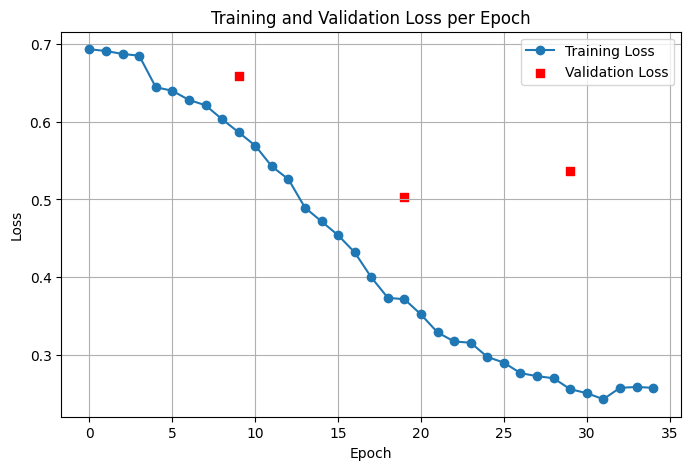

In [1]:
import json
import matplotlib.pyplot as plt

# Leggere il file di log
log_file_path = './output/log.txt'

train_epochs = []
train_losses = []
val_epochs = []
val_losses = []

with open(log_file_path, 'r') as file:
    val_loss_accumulator = []
    val_epoch = None
    
    for line in file:
        data = json.loads(line)
        epoch = data["epoch"]
        train_loss = data["train_loss"]
        
        # Salviamo i dati per la training loss
        if epoch not in train_epochs:
            train_epochs.append(epoch)
            train_losses.append(train_loss)
        
        # Controlliamo se c'è una validation loss
        if "val_loss" in data:
            val_loss_accumulator.append(data["val_loss"])
            val_epoch = epoch
        
        # Ogni 10 epoche, salviamo la media della validation loss
        if val_epoch is not None and val_epoch % 10 == 9:
            avg_val_loss = sum(val_loss_accumulator) / len(val_loss_accumulator)
            val_epochs.append(val_epoch)
            val_losses.append(avg_val_loss)
            val_loss_accumulator = []  # Reset dell'accumulatore
            val_epoch = None

# Plot del grafico
plt.figure(figsize=(8, 5))
plt.plot(train_epochs, train_losses, marker='o', linestyle='-', label='Training Loss')
plt.scatter(val_epochs, val_losses, color='r', marker='s', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()


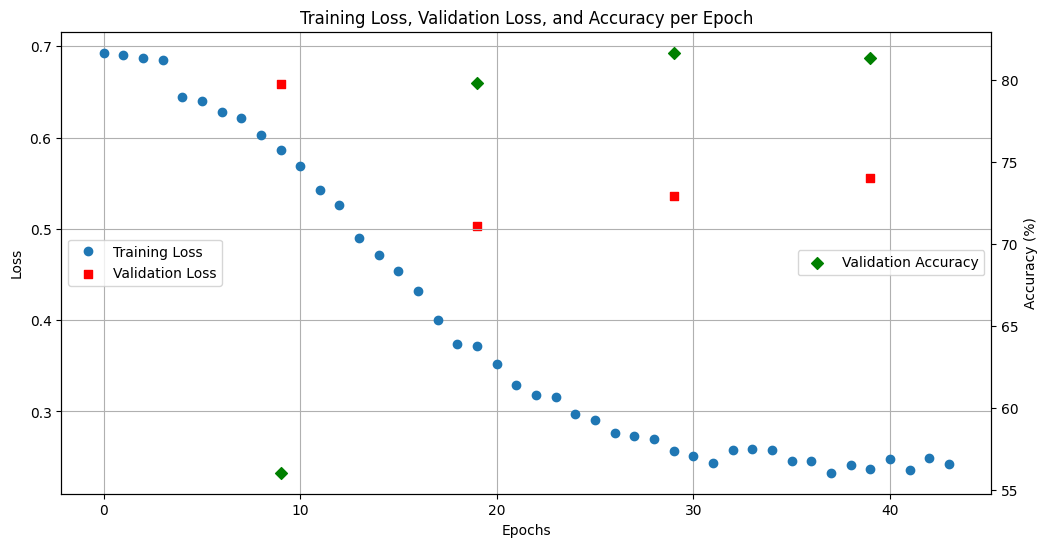

In [15]:
train_epochs = []
train_losses = []
val_epochs = []
val_losses = []
val_accs = []

with open(log_file_path, 'r', encoding="utf-8") as file:
    val_loss_accumulator = []
    val_acc_accumulator = []
    val_epoch = None
    
    for line in file:
        data = json.loads(line)
        epoch = data["epoch"]
        train_loss = data["train_loss"]
        
        # Salviamo i dati per la training loss
        if epoch not in train_epochs:
            train_epochs.append(epoch)
            train_losses.append(train_loss)
        
        # Controlliamo se c'è una validation loss e accuracy
        if "val_loss" in data and "val_acc1" in data:
            val_loss_accumulator.append(data["val_loss"])
            val_acc_accumulator.append(data["val_acc1"])
            val_epoch = epoch
        
        # Ogni 10 epoche, salviamo la media della validation loss e accuracy
        if val_epoch is not None and val_epoch % 10 == 9:
            avg_val_loss = sum(val_loss_accumulator) / len(val_loss_accumulator)
            avg_val_acc = sum(val_acc_accumulator) / len(val_acc_accumulator)
            val_epochs.append(val_epoch)
            val_losses.append(avg_val_loss)
            val_accs.append(avg_val_acc)
            val_loss_accumulator = []  # Reset dell'accumulatore
            val_acc_accumulator = []
            val_epoch = None

# Plot del grafico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Asse sinistro per la loss
ax1.plot(train_epochs, train_losses, marker='o', linestyle='', label='Training Loss')
ax1.scatter(val_epochs, val_losses, color='r', marker='s', label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend(loc='center left')

# Asse destro per l'accuracy
ax2 = ax1.twinx()
ax2.scatter(val_epochs, val_accs, color='g', marker='D', label='Validation Accuracy')
ax2.set_ylabel('Accuracy (%)')
ax2.legend(loc='center right')

plt.title('Training Loss, Validation Loss, and Accuracy per Epoch')
plt.show()
